
# Data
  **Police Department Incident Reports** : 2018 to Present: A documentation of a crime incident that happened from the past to the current time frame, the record includes a detailed time, date, and crime category.

#Fields
 **Incident Reports**:data contains 27 columns.
#Target field
crime_category – a categorical variable representing the type of crime (e.g., larceny, assault, vandalism, etc.).

#Number of attributes

**Incident Reports**: The original dataset contains 10 attributes, but only 7 were selected for modeling after preprocessing.
* Incident Category
* Analysis Neighborhood
* Police District
* Incident Date
* Incident Year
* Incident Day of Week
* Incident Time


#Prediction Goal:
Classify the type of crime based on when and where it occurred, and other structured features. This is a multi-class classification task.



#Loading Data

In [ ]:
!pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 89.5 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from shapely.geometry import Point
from google.colab import drive

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN, KMeans
from sklearn.decomposition import PCA


drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
crime_data_path = "/content/drive/Shareddrives/SF_Crime_Forecasting/Police_Department_Incident_Reports__2018_to_Present_20250429.csv"
crime_df = pd.read_csv(crime_data_path)
crime_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952287 entries, 0 to 952286
Data columns (total 35 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Incident Datetime                                     952287 non-null  object 
 1   Incident Date                                         952287 non-null  object 
 2   Incident Time                                         952287 non-null  object 
 3   Incident Year                                         952287 non-null  int64  
 4   Incident Day of Week                                  952287 non-null  object 
 5   Report Datetime                                       952287 non-null  object 
 6   Row ID                                                952287 non-null  int64  
 7   Incident ID                                           952287 non-null  int64  
 8   Incident Number                             

In [ ]:
crime_df.head(10)

,Incident Datetime,Incident Date,Incident Time,Incident Year,Incident Day of Week,Report Datetime,Row ID,Incident ID,Incident Number,CAD Number,...,Longitude,Point,Neighborhoods,ESNCAG - Boundary File,Central Market/Tenderloin Boundary Polygon - Updated,Civic Center Harm Reduction Project Boundary,HSOC Zones as of 2018-06-05,Invest In Neighborhoods (IIN) Areas,Current Supervisor Districts,Current Police Districts
0,2023/03/01 05:02:00 AM,2023/03/01,05:02,2023,Wednesday,2023/03/11 03:40:00 PM,125379506374,1253795,236046151,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2023/03/14 06:44:00 PM,2023/03/14,18:44,2023,Tuesday,2023/03/14 06:45:00 PM,125402407041,1254024,230176728,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023/02/15 03:00:00 AM,2023/02/15,03:00,2023,Wednesday,2023/03/11 04:55:00 PM,125378606372,1253786,236046123,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2023/03/11 03:00:00 PM,2023/03/11,15:00,2023,Saturday,2023/03/13 08:29:00 AM,125420606244,1254206,236045937,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2023/03/13 07:30:00 AM,2023/03/13,07:30,2023,Monday,2023/03/14 07:11:00 AM,125412306244,1254123,236047096,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2023/03/16 09:26:00 AM,2023/03/16,09:26,2023,Thursday,2023/03/16 09:26:00 AM,125467916780,1254679,230185672,230750962.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2023/03/16 05:30:00 PM,2023/03/16,17:30,2023,Thursday,2023/03/16 06:02:00 PM,125482604134,1254826,230187101,230752550.0,...,-122.401324,POINT (-122.40132418490647 37.76228996810526),54.0,NaN,NaN,NaN,NaN,NaN,9.0,2.0
7,2023/03/16 01:49:00 PM,2023/03/16,13:49,2023,Thursday,2023/03/16 01:49:00 PM,125473107041,1254731,230178047,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2023/03/16 10:15:00 PM,2023/03/16,22:15,2023,Thursday,2023/03/17 12:03:00 PM,125561906374,1255619,236049456,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2023/02/11 02:00:00 PM,2023/02/11,14:00,2023,Saturday,2023/03/18 01:20:00 PM,125564606244,1255646,236050049,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#DATA CLEARNING

In [ ]:
# Make a copy of the original DataFrame
selected_df = crime_df.copy()

# Select only the desired columns (excluding Incident Year now)
selected_columns = [
    "Incident Category",
    "Analysis Neighborhood",
    "Police District",
    "Incident Date",
    "Incident Day of Week",
    "Incident Time",
    "Longitude",
    "Latitude"
]
selected_df = selected_df[selected_columns]

selected_df.head(10)

,Incident Category,Analysis Neighborhood,Police District,Incident Date,Incident Day of Week,Incident Time,Longitude,Latitude
0,Larceny Theft,NaN,Mission,2023/03/01,Wednesday,05:02,NaN,NaN
1,Recovered Vehicle,NaN,Out of SF,2023/03/14,Tuesday,18:44,NaN,NaN
2,Larceny Theft,NaN,Mission,2023/02/15,Wednesday,03:00,NaN,NaN
3,Larceny Theft,NaN,Central,2023/03/11,Saturday,15:00,NaN,NaN
4,Larceny Theft,NaN,Central,2023/03/13,Monday,07:30,NaN,NaN
5,Drug Violation,NaN,Out of SF,2023/03/16,Thursday,09:26,NaN,NaN
6,Assault,Potrero Hill,Bayview,2023/03/16,Thursday,17:30,-122.401324,37.76229
7,Recovered Vehicle,NaN,Out of SF,2023/03/16,Thursday,13:49,NaN,NaN
8,Larceny Theft,NaN,Richmond,2023/03/16,Thursday,22:15,NaN,NaN
9,Larceny Theft,NaN,Central,2023/02/11,Saturday,14:00,NaN,NaN


In [ ]:
for col in selected_df.columns:
    print(f"\nColumn: {col}")
    print(selected_df[col].unique())
print(len(selected_df['Incident Category'].unique()))



Column: Incident Category
['Larceny Theft' 'Recovered Vehicle' 'Drug Violation' 'Assault'
 'Malicious Mischief' 'Lost Property' 'Weapons Carrying Etc' 'Fraud'
 'Warrant' 'Non-Criminal' 'Other Offenses' 'Robbery' 'Case Closure'
 'Stolen Property' 'Other Miscellaneous' 'Other' 'Disorderly Conduct'
 'Rape' 'Drug Offense' 'Missing Person' 'Burglary' 'Fire Report'
 'Suspicious Occ' 'Arson' 'Traffic Violation Arrest'
 'Offences Against The Family And Children' 'Motor Vehicle Theft'
 'Embezzlement' 'Miscellaneous Investigation' 'Vandalism' 'Suicide'
 'Courtesy Report' 'Weapons Offense' 'Traffic Collision'
 'Forgery And Counterfeiting' 'Homicide' 'Vehicle Impounded' nan
 'Prostitution' 'Vehicle Misplaced' 'Suspicious' 'Sex Offense' 'Gambling'
 'Motor Vehicle Theft?' 'Civil Sidewalks' 'Liquor Laws'
 'Human Trafficking (A), Commercial Sex Acts'
 'Human Trafficking, Commercial Sex Acts' 'Weapons Offence'
 'Human Trafficking (B), Involuntary Servitude']

Column: Analysis Neighborhood
[nan 'Potrer

| **Original**                                                                               | **Cleaned**                                   |
| ------------------------------------------------------------------------------------------ | --------------------------------------------- |
| `'Weapons Carrying Etc'`, `'Weapons Offense'`, `'Weapons Offence'`                         | `'Weapons Offense'`                           |
| `'Motor Vehicle Theft'`, `'Motor Vehicle Theft?'`                                          | `'Motor Vehicle Theft'`                       |
| `'Human Trafficking (A), Commercial Sex Acts'`, `'Human Trafficking, Commercial Sex Acts'` | `'Human Trafficking - Commercial Sex Acts'`   |
| `'Human Trafficking (B), Involuntary Servitude'`                                           | `'Human Trafficking - Involuntary Servitude'` |
| `'Forgery And Counterfeiting'`                                                             | `'Forgery & Counterfeiting'`                  |
| `'Suspicious Occ'`, `'Suspicious'`                                                         | `'Suspicious Activity'`                       |


In [ ]:
# Define category cleanup mapping
category_mapping = {
    'Weapons Carrying Etc': 'Weapons Offense',
    'Weapons Offense': 'Weapons Offense',
    'Weapons Offence': 'Weapons Offense',

    'Motor Vehicle Theft?': 'Motor Vehicle Theft',

    'Human Trafficking (A), Commercial Sex Acts': 'Human Trafficking - Commercial Sex Acts',
    'Human Trafficking, Commercial Sex Acts': 'Human Trafficking - Commercial Sex Acts',
    'Human Trafficking (B), Involuntary Servitude': 'Human Trafficking - Involuntary Servitude',

    'Forgery And Counterfeiting': 'Forgery & Counterfeiting',

    'Suspicious Occ': 'Suspicious Activity',
    'Suspicious': 'Suspicious Activity',
}

# Clean and replace values directly in the column
selected_df['Incident Category'] = (
    selected_df['Incident Category']
    .str.strip()
    .replace(category_mapping)
)
print(len(selected_df['Incident Category'].unique()))


45


Transform the columns for better implementation, here is what I did.
- REPLACE the missing value for 'Analysis Neighborhood'
- SORTED the dataframe by  'year', 'month', 'day', 'hour'
- SPLIT the time frame into 'year', 'month', 'day', 'hour' columns
- REMOVED redundance columns
- REMOVED the row that is missing 'Incident Category'(Since the missing rows are only small portion of our data)



In [ ]:
crime_df_cleaned = selected_df.copy()

# Replace missing neighborhood values with "Out of SF"
crime_df_cleaned["Analysis Neighborhood"] = crime_df_cleaned["Analysis Neighborhood"].fillna("Out of SF")

before_drop = crime_df_cleaned.shape[0]
# Drop rows with missing 'Incident Category'
crime_df_cleaned = crime_df_cleaned.dropna(subset=["Incident Category"])
crime_df_cleaned = crime_df_cleaned.dropna(subset=["Longitude"])
crime_df_cleaned = crime_df_cleaned.dropna(subset=["Latitude"])
# After dropping
after_drop = crime_df_cleaned.shape[0]



# Copy for numeric feature extraction
numerify_crime_df_cleaned = crime_df_cleaned.copy()

# Create a datetime column from date and time
numerify_crime_df_cleaned['incident_datetime'] = pd.to_datetime(
    numerify_crime_df_cleaned['Incident Date'] + ' ' + numerify_crime_df_cleaned['Incident Time'],
    errors='coerce'
)

# Convert 'Incident Date' to proper YYYY-MM-DD string format
numerify_crime_df_cleaned['Incident Date'] = pd.to_datetime(
    numerify_crime_df_cleaned['Incident Date'], errors='coerce'
).dt.strftime('%Y-%m-%d')

# Drop time column since it's been split
numerify_crime_df_cleaned = numerify_crime_df_cleaned.drop("Incident Time", axis=1)

# Extract time-based features
numerify_crime_df_cleaned['hour'] = numerify_crime_df_cleaned["incident_datetime"].dt.hour
numerify_crime_df_cleaned['day'] = numerify_crime_df_cleaned["incident_datetime"].dt.day
numerify_crime_df_cleaned['month'] = numerify_crime_df_cleaned["incident_datetime"].dt.month
numerify_crime_df_cleaned['year'] = numerify_crime_df_cleaned["incident_datetime"].dt.year
numerify_crime_df_cleaned['date_of_week'] = numerify_crime_df_cleaned["incident_datetime"].dt.day_of_week

# Clean column names: lowercase, underscore, remove special characters
numerify_crime_df_cleaned.columns = (
    numerify_crime_df_cleaned.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
    .str.replace(r'[^a-zA-Z0-9_]', '', regex=True)
)

numerify_crime_df_cleaned = numerify_crime_df_cleaned.drop("incident_datetime", axis=1)

numerify_crime_df_cleaned = numerify_crime_df_cleaned.sort_values(by=['year', 'month', 'day', 'hour'])
print("Rows before drop:", before_drop)
print("Rows after drop:", after_drop)
print("Rows dropped:", before_drop - after_drop)
percent_lost = (before_drop - after_drop) / before_drop * 100
print(f"{percent_lost:.2f}% of rows have been lost")
numerify_crime_df_cleaned.head()
numerify_crime_df_cleaned.isna().sum()

Rows before drop: 952287
Rows after drop: 899225
Rows dropped: 53062
5.57% of rows have been lost


,0
incident_category,0
analysis_neighborhood,0
police_district,0
incident_date,0
incident_day_of_week,0
longitude,0
latitude,0
hour,0
day,0
month,0




#**DATA TRANFORMAING**


In [ ]:
# Create proper aggregation for regression task
crime_count_df = numerify_crime_df_cleaned.copy()
crime_counts_hourly = numerify_crime_df_cleaned.groupby(['year', 'month', 'day', 'hour']).size().reset_index(name='crime_count_hourly')
crime_counts_neighborhood = numerify_crime_df_cleaned.groupby(['year', 'month', 'day', 'hour', 'analysis_neighborhood']).size().reset_index(name='crime_count_neighborhood')
crime_counts_police_district = numerify_crime_df_cleaned.groupby(['year', 'month', 'day', 'hour', 'police_district']).size().reset_index(name='crime_count_police_district')
crime_counts_incident_category = numerify_crime_df_cleaned.groupby(['year', 'month', 'day', 'hour', 'incident_category']).size().reset_index(name='crime_count_incident_category')
crime_count_df = crime_count_df.merge(crime_counts_hourly, on=['year', 'month', 'day', 'hour'], how='left')
crime_count_df = crime_count_df.merge(crime_counts_neighborhood, on=['year', 'month', 'day', 'hour', 'analysis_neighborhood'], how='left')
crime_count_df = crime_count_df.merge(crime_counts_police_district, on=['year', 'month', 'day', 'hour', 'police_district'], how='left')
crime_count_df = crime_count_df.merge(crime_counts_incident_category, on=['year', 'month', 'day', 'hour', 'incident_category'], how='left')

crime_count_df.nunique()


,0
incident_category,44
analysis_neighborhood,42
police_district,11
incident_date,2675
incident_day_of_week,7
longitude,12049
latitude,12538
hour,24
day,31
month,12


In [ ]:
#Labeling the data
le = LabelEncoder()
crime_count_df['incident_category_label'] = le.fit_transform(crime_count_df['incident_category'])
crime_count_df['analysis_neighborhood_label'] = le.fit_transform(crime_count_df['analysis_neighborhood'])
crime_count_df['police_district_label'] = le.fit_transform(crime_count_df['police_district'])


In [ ]:
crime_count_df.head()

,incident_category,analysis_neighborhood,police_district,incident_date,incident_day_of_week,longitude,latitude,hour,day,month,year,date_of_week,crime_count_hourly,crime_count_neighborhood,crime_count_police_district,crime_count_incident_category,incident_category_label,analysis_neighborhood_label,police_district_label
0,Larceny Theft,Mission,Mission,2018-01-01,Monday,-122.406636,37.756167,0,1,1,2018,0,121,10,10,24,17,18,3
1,Lost Property,Bayview Hunters Point,Bayview,2018-01-01,Monday,-122.381378,37.725735,0,1,1,2018,0,121,11,16,10,19,0,0
2,Fraud,Mission Bay,Southern,2018-01-01,Monday,-122.391434,37.773467,0,1,1,2018,0,121,6,12,39,12,19,8
3,Missing Person,Outer Mission,Ingleside,2018-01-01,Monday,-122.443069,37.724987,0,1,1,2018,0,121,4,6,6,22,25,2
4,Miscellaneous Investigation,Lone Mountain/USF,Northern,2018-01-01,Monday,-122.441681,37.777374,0,1,1,2018,0,121,2,21,7,21,15,4




#**DATA EXPLORING**


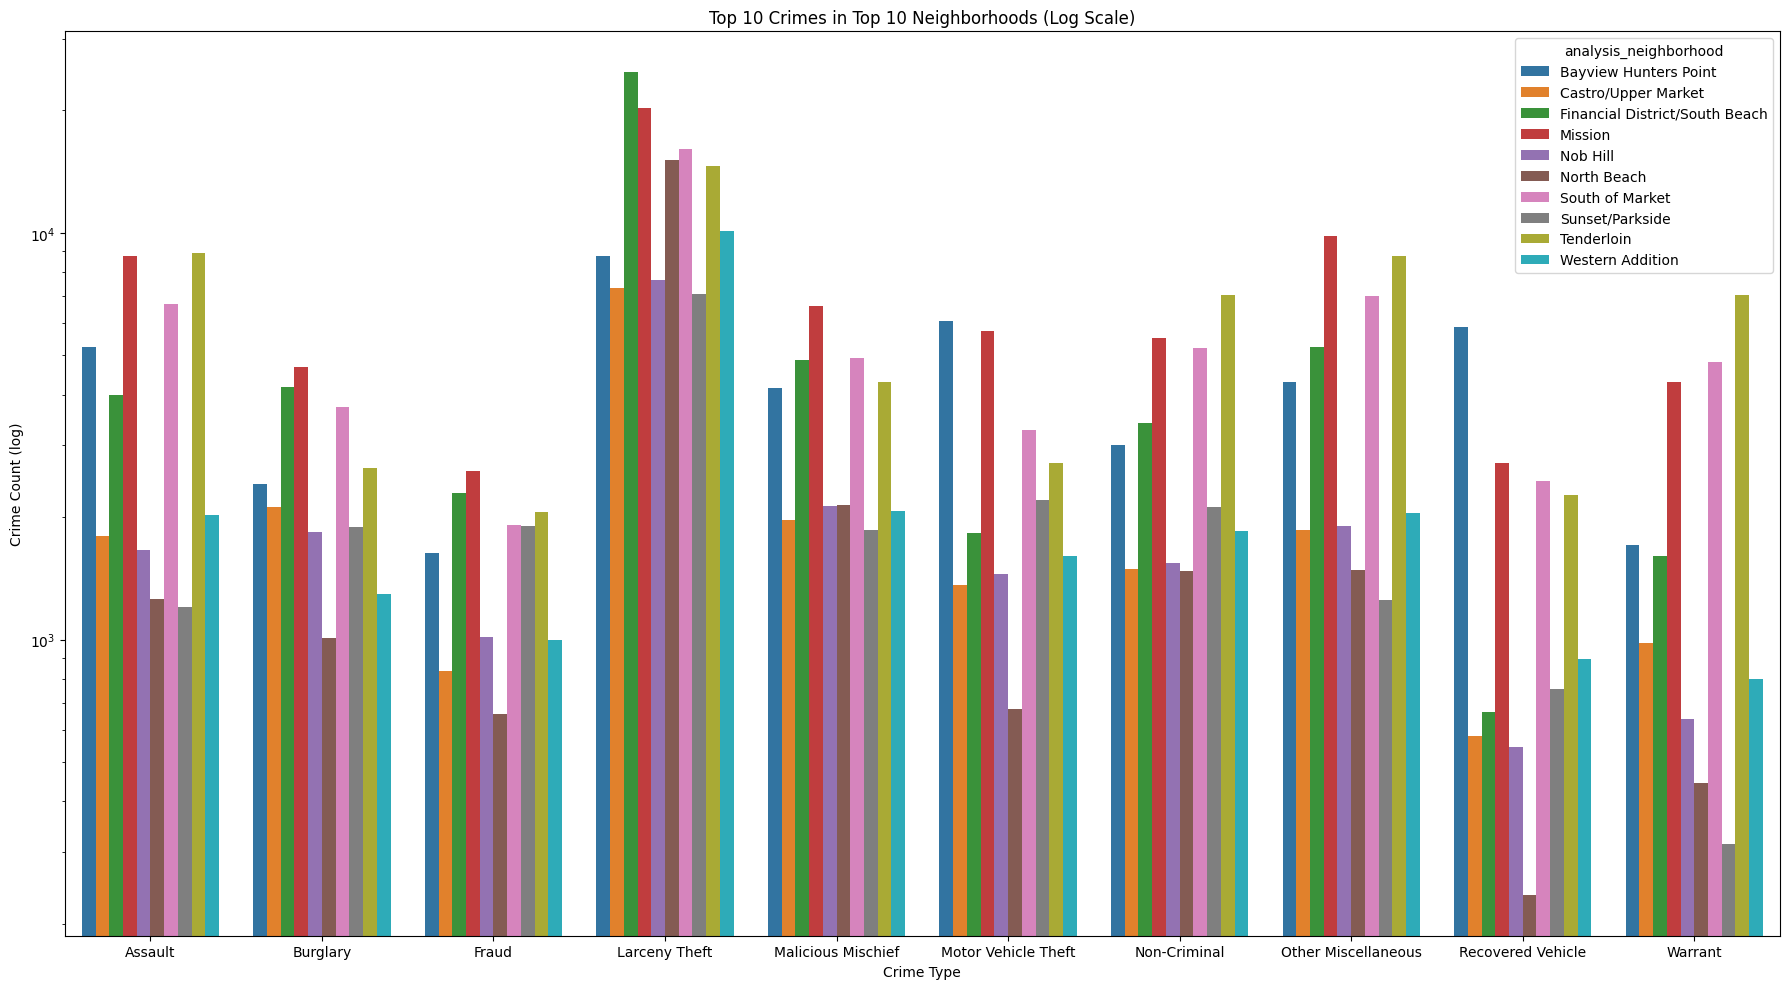

In [ ]:


top5_neigh = crime_count_df['analysis_neighborhood'].value_counts().head(10).index

top5_crimes = crime_count_df['incident_category'].value_counts().head(10).index

filtered_df = crime_count_df[
    (crime_count_df['analysis_neighborhood'].isin(top5_neigh)) &
    (crime_count_df['incident_category'].isin(top5_crimes))
]

grouped = (
    filtered_df.groupby(['analysis_neighborhood', 'incident_category'])
    .size()
    .reset_index(name='count')
)

plt.figure(figsize=(18, 10))
sns.barplot(
    data=grouped,
    x='incident_category',
    y='count',
    hue='analysis_neighborhood'
)
plt.yscale('log')  # Log scale for better visibility
plt.title("Top 10 Crimes in Top 10 Neighborhoods (Log Scale)")
plt.xlabel("Crime Type")
plt.ylabel("Crime Count (log)")
plt.tight_layout()
plt.show()


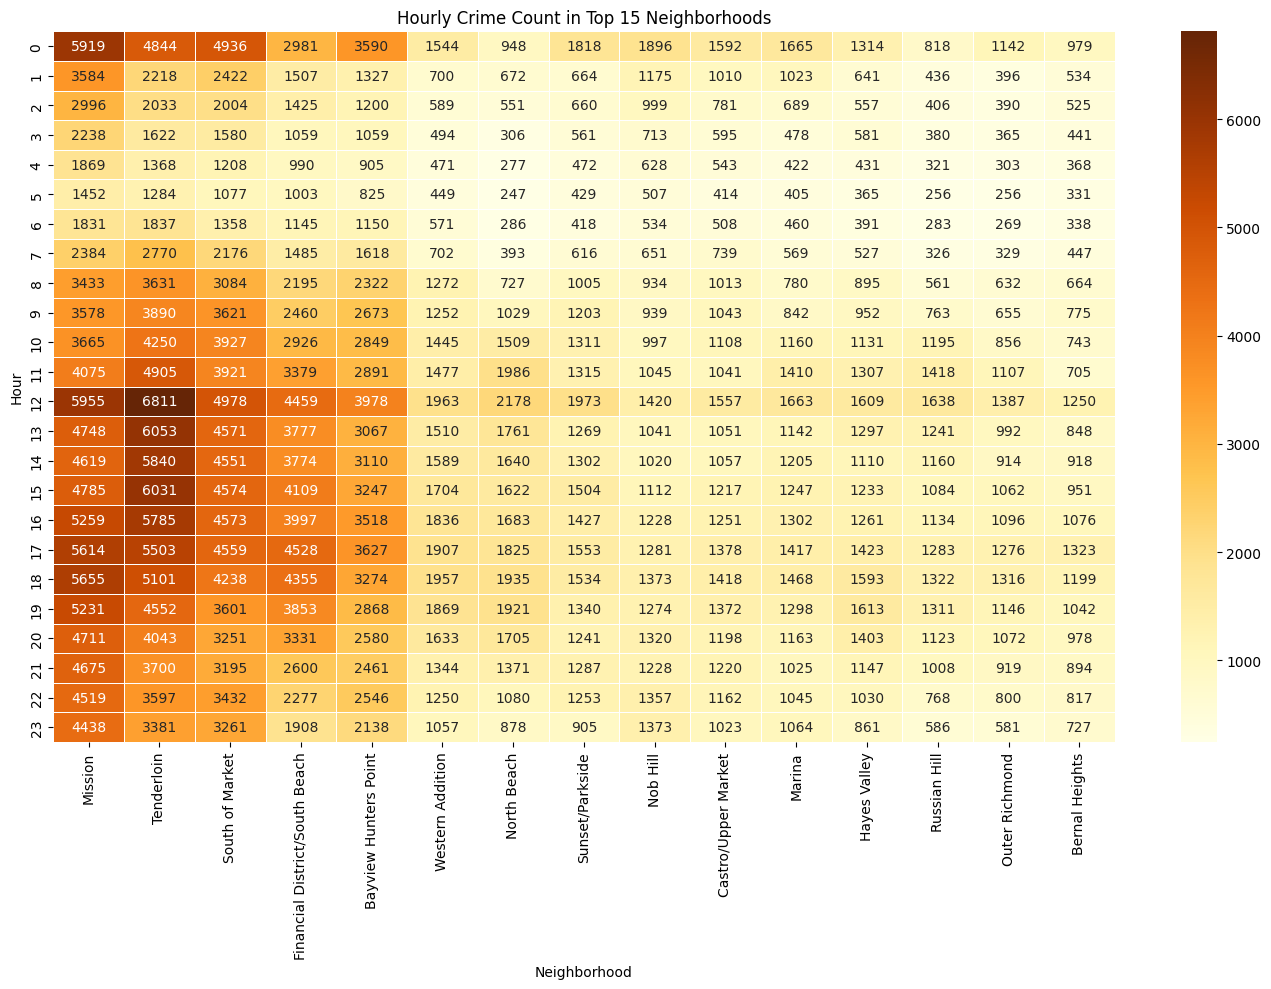

In [ ]:
heatmap_data = crime_count_df.pivot_table(
    index='hour',
    columns='analysis_neighborhood',
    values='incident_category',
    aggfunc='count',
    fill_value=0
)

top_10_neighs = crime_count_df['analysis_neighborhood'].value_counts().head(15).index
heatmap_filtered = heatmap_data[top_10_neighs]

plt.figure(figsize=(14, 10))
sns.heatmap(heatmap_filtered, cmap='YlOrBr', linewidths=0.5, annot=True, fmt='d')
plt.title("Hourly Crime Count in Top 15 Neighborhoods")
plt.xlabel("Neighborhood")
plt.ylabel("Hour")
plt.tight_layout()
plt.show()


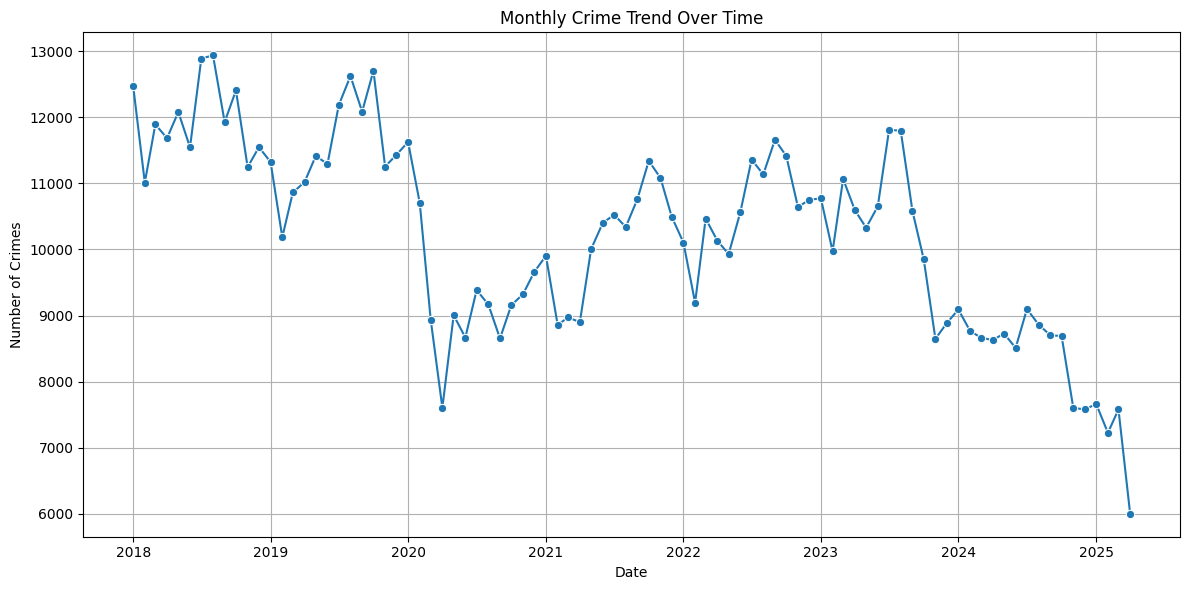

In [ ]:

monthly = crime_count_df.groupby(['year', 'month']).size().reset_index(name='crime_count')
monthly['date'] = pd.to_datetime(monthly[['year', 'month']].assign(day=1))

plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly, x='date', y='crime_count', marker='o')
plt.title("Monthly Crime Trend Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Crimes")
plt.grid(True)
plt.tight_layout()
plt.show()


#CLUSTERING



The main goal for this part is to find out two different pattern
1. Using DBSCAN Clustering to Visualize and understand crime hotspots
2. Find out the crime density or frequency context
Include features that indicate how active or dangerous a time/place is


In [ ]:
crime_count_df.head()

,incident_category,analysis_neighborhood,police_district,incident_date,incident_day_of_week,longitude,latitude,hour,day,month,year,date_of_week,crime_count_hourly,crime_count_neighborhood,crime_count_police_district,crime_count_incident_category,incident_category_label,analysis_neighborhood_label,police_district_label
0,Larceny Theft,Mission,Mission,2018-01-01,Monday,-122.406636,37.756167,0,1,1,2018,0,121,10,10,24,17,18,3
1,Lost Property,Bayview Hunters Point,Bayview,2018-01-01,Monday,-122.381378,37.725735,0,1,1,2018,0,121,11,16,10,19,0,0
2,Fraud,Mission Bay,Southern,2018-01-01,Monday,-122.391434,37.773467,0,1,1,2018,0,121,6,12,39,12,19,8
3,Missing Person,Outer Mission,Ingleside,2018-01-01,Monday,-122.443069,37.724987,0,1,1,2018,0,121,4,6,6,22,25,2
4,Miscellaneous Investigation,Lone Mountain/USF,Northern,2018-01-01,Monday,-122.441681,37.777374,0,1,1,2018,0,121,2,21,7,21,15,4


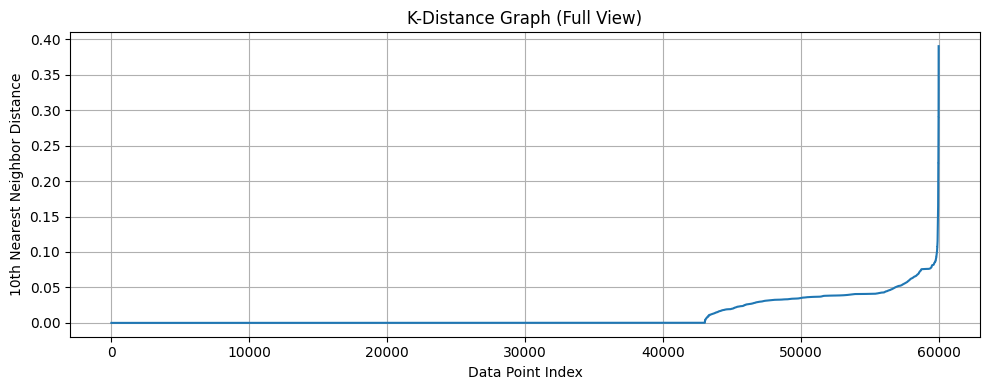

In [ ]:
# Picking a sample size to find the feasible eps value
coords_sampled = crime_count_df[['longitude', 'latitude']].dropna().sample(n=60000, random_state=42)
coords_scaled = StandardScaler().fit_transform(coords_sampled)

neighbors = NearestNeighbors(n_neighbors=10)
neighbors_fit = neighbors.fit(coords_scaled)
distances, indices = neighbors_fit.kneighbors(coords_scaled)
distances = np.sort(distances[:, -1])

plt.figure(figsize=(10, 4))
plt.plot(distances)
plt.title("K-Distance Graph (Full View)")
plt.xlabel("Data Point Index")
plt.ylabel("10th Nearest Neighbor Distance")
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
dbscan = DBSCAN(eps=0.05, min_samples=10)
labels = dbscan.fit_predict(coords_scaled)

# Assign labels to both DataFrames
coords_sampled = coords_sampled.copy()
coords_sampled['dbscan_cluster'] = labels

# Also assign to original full dataset (if needed)
crime_count_df['dbscan_cluster'] = -1
crime_count_df.loc[coords_sampled.index, 'dbscan_cluster'] = labels


<ipython-input-20-5f2ea70d8500>:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  gdf_filtered = gdf.groupby('dbscan_cluster', group_keys=False).apply(cluster_filter)


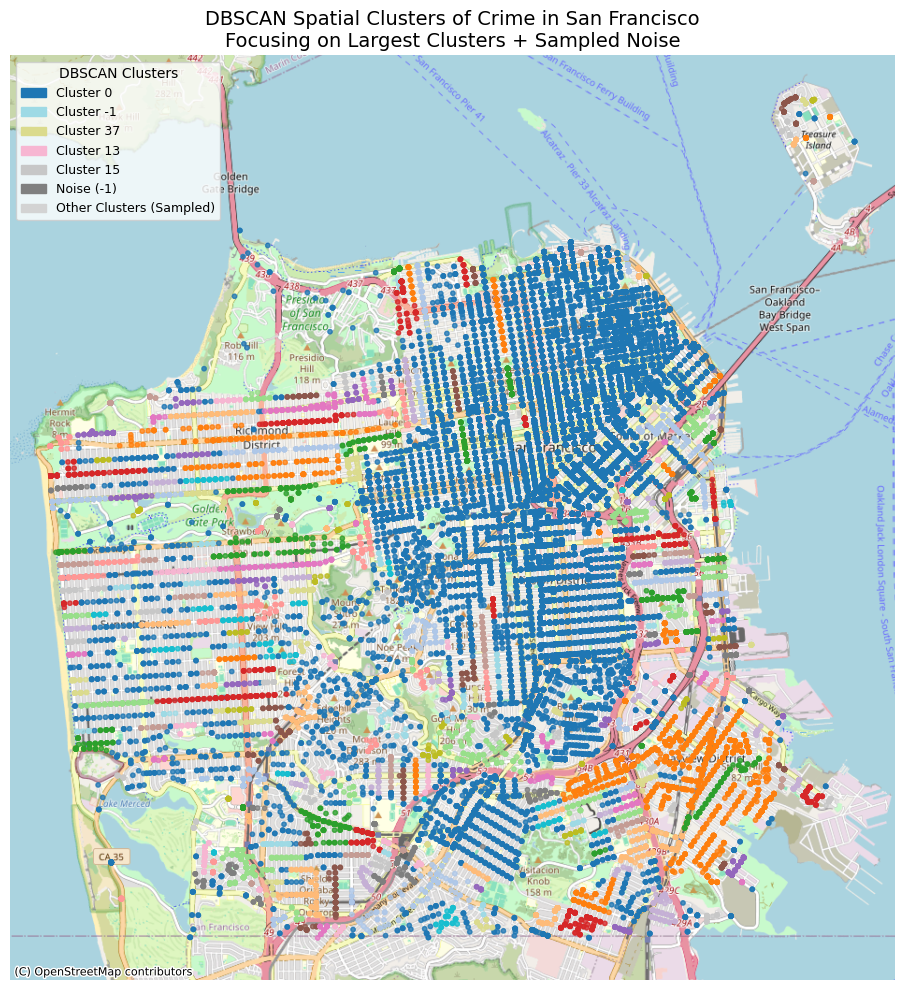

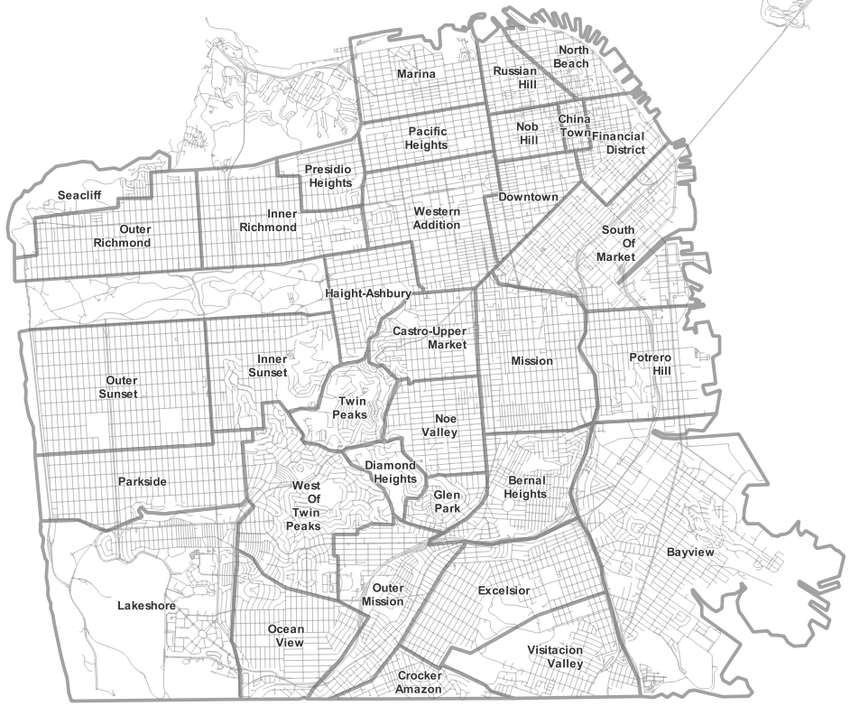

In [ ]:
import geopandas as gpd
import contextily as cx
import matplotlib.pyplot as plt
from shapely.geometry import Point
import matplotlib.patches as mpatches
from IPython.display import Image


# Step 1: Create GeoDataFrame with geometry and cluster labels
gdf = coords_sampled.copy()
gdf['geometry'] = gdf.apply(lambda row: Point(row['longitude'], row['latitude']), axis=1)
gdf = gpd.GeoDataFrame(gdf, geometry='geometry', crs='EPSG:4326')
gdf['dbscan_cluster'] = coords_sampled['dbscan_cluster'].values

# Step 2: Reproject for basemap
gdf = gdf.to_crs(epsg=3857)

# Step 3: Keep all from top 5 largest clusters; drop or sample others
cluster_counts = gdf['dbscan_cluster'].value_counts()
top_clusters = cluster_counts.head(5).index

def cluster_filter(df):
    cid = df.name
    if cid in top_clusters:
        return df  # keep all
    elif cid == -1:
        return df.sample(n=min(len(df), 300), random_state=42)  # sample noise
    else:
        return df.sample(n=min(len(df), 100), random_state=42)  # reduce small clusters

gdf_filtered = gdf.groupby('dbscan_cluster', group_keys=False).apply(cluster_filter)

# Step 4: Plot
fig, ax = plt.subplots(figsize=(12, 10))

gdf_filtered.plot(
    ax=ax,
    column='dbscan_cluster',
    cmap='tab20',
    markersize=10,
    alpha=0.8,
    legend=False
)

cx.add_basemap(ax, source=cx.providers.OpenStreetMap.Mapnik)

# Step 5: Legend (top 5 + noise)
legend_handles = []
for cluster in top_clusters:
    label = f"Cluster {cluster}"
    color = plt.cm.tab20(cluster % 20)
    legend_handles.append(mpatches.Patch(color=color, label=label))

if -1 in cluster_counts:
    legend_handles.append(mpatches.Patch(color='gray', label="Noise (-1)"))

legend_handles.append(mpatches.Patch(color='lightgray', label="Other Clusters (Sampled)"))

ax.legend(handles=legend_handles, title='DBSCAN Clusters', loc='upper left', fontsize=9)

ax.set_title(
    "DBSCAN Spatial Clusters of Crime in San Francisco\nFocusing on Largest Clusters + Sampled Noise",
    fontsize=14
)
ax.set_axis_off()
plt.tight_layout()
plt.show()
Image(filename='/content/drive/Shareddrives/SF_Crime_Forecasting/SF_MAP.png')

Index([0, -1, 37, 13, 15], dtype='int64', name='dbscan_cluster')


<ipython-input-48-3e2c93220335>:21: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



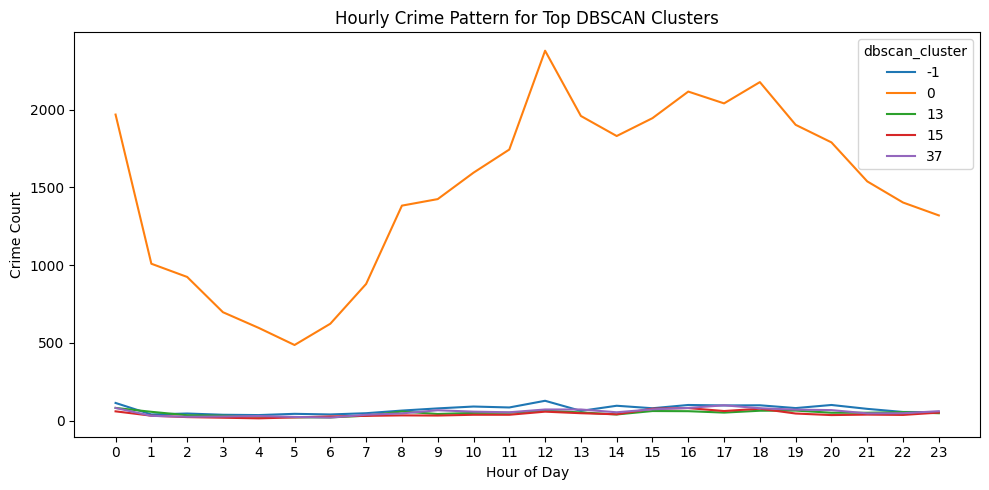

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Merge hour info into coords_sampled
coords_sampled = coords_sampled.copy()
coords_sampled['hour'] = crime_count_df.loc[coords_sampled.index, 'hour'].values

# Step 2: Get top 5 clusters by size
top_clusters = coords_sampled['dbscan_cluster'].value_counts().head(5).index
print(top_clusters)
# Step 3: Build filtered sample based on cluster type
def cluster_viz_filter(df):
    cid = df.name
    if cid in top_clusters:
        return df  # keep all top clusters
    elif cid == -1:
        return df.sample(n=min(len(df), 200), random_state=42)  # small noise sample
    else:
        return df.sample(n=min(len(df), 100), random_state=42)  # tiny clusters

viz_sample = coords_sampled.groupby('dbscan_cluster', group_keys=False).apply(cluster_viz_filter)

# Step 4: Limit to top clusters for plotting clarity
viz_sample = viz_sample[viz_sample['dbscan_cluster'].isin(top_clusters)]

# Step 5: Group and count
hourly_by_cluster = (
    viz_sample.groupby(['dbscan_cluster', 'hour'])
    .size()
    .reset_index(name='count')
)

# Step 6: Plot
plt.figure(figsize=(10, 5))
sns.lineplot(
    data=hourly_by_cluster,
    x='hour',
    y='count',
    hue='dbscan_cluster',
    errorbar=None,
    palette='tab10'
)
plt.title("Hourly Crime Pattern for Top DBSCAN Clusters")
plt.xlabel("Hour of Day")
plt.ylabel("Crime Count")
plt.xticks(range(0, 24))
plt.tight_layout()
plt.show()


In [ ]:
crime_count_df.head()

,incident_category,analysis_neighborhood,police_district,incident_date,incident_day_of_week,longitude,latitude,hour,day,month,...,date_of_week,crime_count_hourly,crime_count_neighborhood,crime_count_police_district,crime_count_incident_category,incident_category_label,analysis_neighborhood_label,police_district_label,dbscan_cluster,crime_type_group
0,Larceny Theft,Mission,Mission,2018-01-01,Monday,-122.406636,37.756167,0,1,1,...,0,121,10,10,24,17,18,3,-1,3
1,Lost Property,Bayview Hunters Point,Bayview,2018-01-01,Monday,-122.381378,37.725735,0,1,1,...,0,121,11,16,10,19,0,0,-1,2
2,Fraud,Mission Bay,Southern,2018-01-01,Monday,-122.391434,37.773467,0,1,1,...,0,121,6,12,39,12,19,8,-1,2
3,Missing Person,Outer Mission,Ingleside,2018-01-01,Monday,-122.443069,37.724987,0,1,1,...,0,121,4,6,6,22,25,2,-1,2
4,Miscellaneous Investigation,Lone Mountain/USF,Northern,2018-01-01,Monday,-122.441681,37.777374,0,1,1,...,0,121,2,21,7,21,15,4,-1,2


In [ ]:
filtered_top_crimes = (
    crime_count_df[crime_count_df['dbscan_cluster'].isin(top_clusters)]
    .groupby('dbscan_cluster')['incident_category']
    .value_counts()
    .groupby(level=0)
    .head(3)
    .reset_index(name='count')
)
filtered_top_crimes

,dbscan_cluster,incident_category,count
0,-1,Larceny Theft,236285
1,-1,Other Miscellaneous,60571
2,-1,Malicious Mischief,57564
3,0,Larceny Theft,9969
4,0,Other Miscellaneous,2815
5,0,Assault,2486
6,13,Larceny Theft,348
7,13,Burglary,120
8,13,Malicious Mischief,95
9,15,Larceny Theft,164


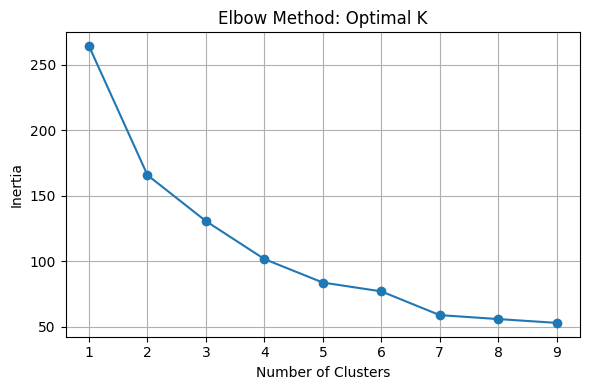

In [ ]:

import plotly.express as px


# STEP 1: Aggregate by incident_category
grouped = crime_count_df.groupby("incident_category")[[
    "hour",
    "day",
    "month",
    "crime_count_hourly",
    "crime_count_incident_category",
    "crime_count_police_district"
]].mean()

# STEP 2: Standardize features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(grouped)

# STEP 3: Elbow Method to find optimal k
inertia = []
k_range = range(1, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(6, 4))
plt.plot(k_range, inertia, marker='o')
plt.title('Elbow Method: Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.tight_layout()
plt.show()

# STEP 4: Choose K (e.g. 4) and fit KMeans
optimal_k = 4
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
labels = kmeans.fit_predict(scaled_features)
grouped["crime_type_group"] = labels

# STEP 5: PCA for 2D visualization
pca = PCA(n_components=2)
components = pca.fit_transform(scaled_features)

pca_df = pd.DataFrame(components, columns=["PC1", "PC2"])
pca_df["incident_category"] = grouped.index
pca_df["cluster"] = labels

# STEP 6: Plot interactive cluster view with Plotly
fig = px.scatter(
    pca_df,
    x="PC1", y="PC2",
    color=pca_df["cluster"].astype(str),
    hover_name="incident_category",
    title="Crime Type Clusters (PCA 2D)",
    labels={"cluster": "Cluster"},
    width=800,
    height=500
)
fig.show()

# STEP 7: Map cluster labels back to full dataframe
label_map = grouped["crime_type_group"].to_dict()
crime_count_df["crime_type_group"] = crime_count_df["incident_category"].map(label_map)


#**CLASSIFICATION MODEL TRAINING AND EVLAUTION**

In [ ]:
cols = [
    "hour", "day", "month", "year", "date_of_week",
    "crime_count_hourly", "crime_count_neighborhood",
    "crime_count_police_district", "crime_count_incident_category",
    "analysis_neighborhood_label", "police_district_label",
    "dbscan_cluster",'crime_type_group'
]
target = "crime_type_group"
class_train_df = crime_count_df[cols].copy()
class_train_df.info()
class_train_df.nunique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 899225 entries, 0 to 899224
Data columns (total 13 columns):
 #   Column                         Non-Null Count   Dtype
---  ------                         --------------   -----
 0   hour                           899225 non-null  int32
 1   day                            899225 non-null  int32
 2   month                          899225 non-null  int32
 3   year                           899225 non-null  int32
 4   date_of_week                   899225 non-null  int32
 5   crime_count_hourly             899225 non-null  int64
 6   crime_count_neighborhood       899225 non-null  int64
 7   crime_count_police_district    899225 non-null  int64
 8   crime_count_incident_category  899225 non-null  int64
 9   analysis_neighborhood_label    899225 non-null  int64
 10  police_district_label          899225 non-null  int64
 11  dbscan_cluster                 899225 non-null  int64
 12  crime_type_group               899225 non-null  int64
dtyp

,0
hour,24
day,31
month,12
year,8
date_of_week,7
crime_count_hourly,81
crime_count_neighborhood,31
crime_count_police_district,33
crime_count_incident_category,39
analysis_neighborhood_label,42


In [ ]:
crime_count_df.groupby("crime_type_group")["incident_category"].value_counts().groupby(level=0).head(5)

crime_type_group  incident_category                        
0                 Human Trafficking - Involuntary Servitude         3
1                 Other Miscellaneous                           64765
                  Warrant                                       28770
                  Drug Offense                                  25798
                  Weapons Offense                               12008
                  Traffic Violation Arrest                       8599
2                 Malicious Mischief                            61539
                  Assault                                       59704
                  Non-Criminal                                  54216
                  Burglary                                      52287
                  Motor Vehicle Theft                           51536
3                 Larceny Theft                                252675
Name: count, dtype: int64

In [ ]:
# Drop group 0 entirely
class_train_df = class_train_df[class_train_df["crime_type_group"] != 0]


In [ ]:
class_train_df["crime_type_group"].value_counts(10)

,proportion
crime_type_group,
2,0.551617
3,0.280993
1,0.167390


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report
features = [
    "hour", "day", "month", "year", "date_of_week",
    "crime_count_hourly", "crime_count_neighborhood",
    "crime_count_police_district", "crime_count_incident_category",
    "analysis_neighborhood_label", "police_district_label",
    "dbscan_cluster"
]
target = "crime_type_group"

X = class_train_df[features]
y = class_train_df[target]
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)



In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# === Random Forestb ===
rf_model = RandomForestClassifier(random_state=42, class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n RandomForest")
print(classification_report(y_test, y_pred_rf, zero_division=0))

# === Logistic Regression ===
lr_model = LogisticRegression(multi_class="multinomial", max_iter=500, class_weight='balanced')
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("\n LogisticRegression")
print(classification_report(y_test, y_pred_lr, zero_division=0))

# === Decision Tree ===
dt_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("\n DecisionTree")
print(classification_report(y_test, y_pred_dt, zero_division=0))







 RandomForest
              precision    recall  f1-score   support

           1       0.64      0.44      0.52     30104
           2       0.78      0.89      0.83     99206
           3       0.89      0.82      0.85     50535

    accuracy                           0.79    179845
   macro avg       0.77      0.71      0.73    179845
weighted avg       0.79      0.79      0.78    179845



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning:

'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.




 LogisticRegression
              precision    recall  f1-score   support

           1       0.36      0.55      0.43     30104
           2       0.78      0.63      0.70     99206
           3       0.78      0.83      0.81     50535

    accuracy                           0.67    179845
   macro avg       0.64      0.67      0.65    179845
weighted avg       0.71      0.67      0.69    179845


 DecisionTree
              precision    recall  f1-score   support

           1       0.46      0.53      0.49     30104
           2       0.78      0.75      0.77     99206
           3       0.81      0.80      0.80     50535

    accuracy                           0.73    179845
   macro avg       0.68      0.69      0.69    179845
weighted avg       0.74      0.73      0.73    179845



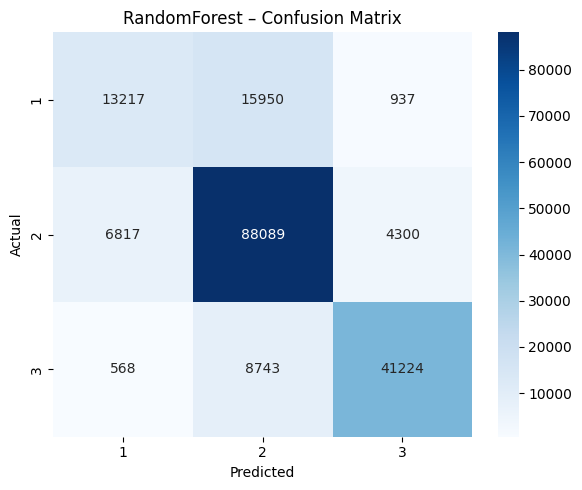

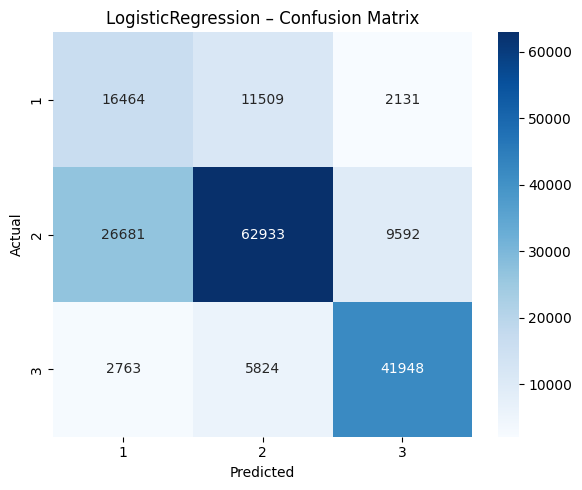

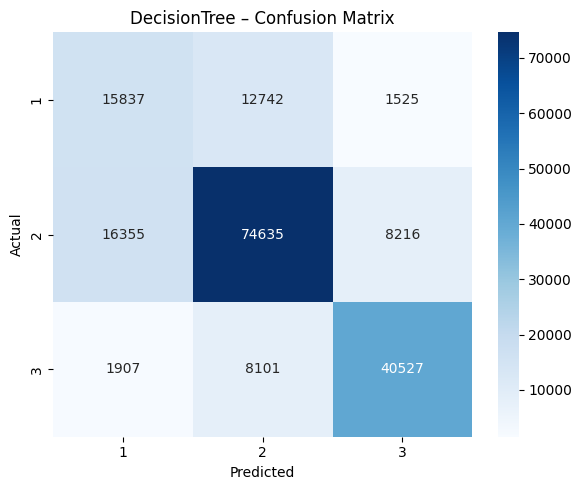

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate_confusion(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[1, 2, 3], yticklabels=[1, 2, 3])
    plt.title(f"{model_name} – Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

evaluate_confusion(y_test, y_pred_rf, "RandomForest")
evaluate_confusion(y_test, y_pred_lr, "LogisticRegression")
evaluate_confusion(y_test, y_pred_dt, "DecisionTree")

In [ ]:
crime_count_df.groupby("crime_type_group")["incident_category"].value_counts().groupby(level=0).head(5)

crime_type_group  incident_category                        
0                 Human Trafficking - Involuntary Servitude         3
1                 Other Miscellaneous                           64765
                  Warrant                                       28770
                  Drug Offense                                  25798
                  Weapons Offense                               12008
                  Traffic Violation Arrest                       8599
2                 Malicious Mischief                            61539
                  Assault                                       59704
                  Non-Criminal                                  54216
                  Burglary                                      52287
                  Motor Vehicle Theft                           51536
3                 Larceny Theft                                252675
Name: count, dtype: int64



---


 **LSTM Training**

---



In [ ]:
lstm_train_df = class_train_df.sort_values(by=["year", "month", "day", "hour"]).reset_index(drop=True)


In [ ]:
features = [
    "hour", "day", "month", "year", "date_of_week",
    "crime_count_hourly", "crime_count_neighborhood",
    "crime_count_police_district", "crime_count_incident_category",
    "analysis_neighborhood_label", "police_district_label",
    "dbscan_cluster"
]


In [ ]:

scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(lstm_train_df[features])


In [ ]:

timesteps = 24
X_lstm = []
y_lstm = []

for i in range(len(scaled_features) - timesteps):
    X_lstm.append(scaled_features[i:i+timesteps])
    y_lstm.append(lstm_train_df["crime_type_group"].iloc[i+timesteps])

X_lstm = np.array(X_lstm)
y_lstm = np.array(y_lstm)


In [ ]:
from sklearn.model_selection import train_test_split

X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_lstm, y_lstm, test_size=0.2, stratify=y_lstm, random_state=42
)


In [ ]:
# === Training Process ===
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint

# Build the model
model = Sequential()
model.add(LSTM(64, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(4, activation='softmax'))  # 4 output classes (crime_type_group)

# Compile the model
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Set up early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
checkpoint = ModelCheckpoint("model_checkpoint.h5", save_best_only=True)

# Train the model
history = model.fit(
    X_train_lstm,
    y_train_lstm,
    epochs=40,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop, checkpoint],
    verbose=1
)


In [ ]:
# === Resume ===
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import ModelCheckpoint
# Set up early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)
checkpoint = ModelCheckpoint("model_checkpoint.h5", save_best_only=True)
model = load_model("model_checkpoint.h5")

# Recompile before training more
model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

model.fit(
    X_train_lstm,
    y_train_lstm,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/20
8992/8992 ━━━━━━━━━━━━━━━━━━━━ 191s 21ms/step - accuracy: 0.5799 - loss: 0.9324 - val_accuracy: 0.5788 - val_loss: 0.9341
Epoch 2/20
8992/8992 ━━━━━━━━━━━━━━━━━━━━ 203s 21ms/step - accuracy: 0.5792 - loss: 0.9321 - val_accuracy: 0.5779 - val_loss: 0.9349
Epoch 3/20
8992/8992 ━━━━━━━━━━━━━━━━━━━━ 181s 20ms/step - accuracy: 0.5791 - loss: 0.9331 - val_accuracy: 0.5750 - val_loss: 0.9382
Epoch 4/20
8992/8992 ━━━━━━━━━━━━━━━━━━━━ 181s 20ms/step - accuracy: 0.5788 - loss: 0.9333 - val_accuracy: 0.5781 - val_loss: 0.9339
Epoch 5/20
8992/8992 ━━━━━━━━━━━━━━━━━━━━ 204s 20ms/step - accuracy: 0.5812 - loss: 0.9302 - val_accuracy: 0.5794 - val_loss: 0.9329
Epoch 6/20
8992/8992 ━━━━━━━━━━━━━━━━━━━━ 203s 20ms/step - accuracy: 0.5805 - loss: 0.9301 - val_accuracy: 0.5768 - val_loss: 0.9359
Epoch 7/20
8992/8992 ━━━━━━━━━━━━━━━━━━━━ 183s 20ms/step - accuracy: 0.5803 - loss: 0.9305 - val_accuracy: 0.5803 - val_loss: 0.9328
Epoch 8/20
8992/8992 ━━━━━━━━━━━━━━━━━━━━ 200s 20ms/step - accuracy: 